In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize 
import json

import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics
import lightgbm as lgb

In [3]:


data_ip = pd.read_csv("C:\\Users\\admin\\Documents\\Gstore\\train.csv",converters={column: json.loads for column in ['device','geoNetwork','totals','trafficSource'] })

C:\Users\admin\Anaconda3\envs\light1\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
import json
import pandas as pd
from pandas.io.json import json_normalize
data_test= pd.read_csv("C:\\Users\\admin\\Documents\\Gstore\\test.csv",converters={column: json.loads for column in ['device','geoNetwork','totals','trafficSource'] })
data_json_test = pd.DataFrame()
data_json_test[['device','geoNetwork','totals','trafficSource']] = data_test[['device','geoNetwork','totals','trafficSource']]
json_cols = ['device','geoNetwork','totals','trafficSource']
update_data_test = pd.DataFrame()
for i in json_cols:
    update_data_test = pd.concat([update_data_test,pd.DataFrame(json_normalize(data_json_test[i]))],axis = 1)
update_data_test = pd.DataFrame(update_data_test)
data_prep_test = update_data_test
data_test = data_test.drop(json_cols,axis=1)
data_json_test = pd.concat([data_test,update_data_test],axis=1)

In [5]:
data_ip.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{'browser': 'Chrome', 'browserVersion': 'not a...",1131660440785968503,"{'continent': 'Asia', 'subContinent': 'Western...",1131660440785968503_1472830385,Not Socially Engaged,"{'visits': '1', 'hits': '1', 'pageviews': '1',...","{'campaign': '(not set)', 'source': 'google', ...",1472830385,1,1472830385
1,Organic Search,20160902,"{'browser': 'Firefox', 'browserVersion': 'not ...",377306020877927890,"{'continent': 'Oceania', 'subContinent': 'Aust...",377306020877927890_1472880147,Not Socially Engaged,"{'visits': '1', 'hits': '1', 'pageviews': '1',...","{'campaign': '(not set)', 'source': 'google', ...",1472880147,1,1472880147
2,Organic Search,20160902,"{'browser': 'Chrome', 'browserVersion': 'not a...",3895546263509774583,"{'continent': 'Europe', 'subContinent': 'South...",3895546263509774583_1472865386,Not Socially Engaged,"{'visits': '1', 'hits': '1', 'pageviews': '1',...","{'campaign': '(not set)', 'source': 'google', ...",1472865386,1,1472865386
3,Organic Search,20160902,"{'browser': 'UC Browser', 'browserVersion': 'n...",4763447161404445595,"{'continent': 'Asia', 'subContinent': 'Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{'visits': '1', 'hits': '1', 'pageviews': '1',...","{'campaign': '(not set)', 'source': 'google', ...",1472881213,1,1472881213
4,Organic Search,20160902,"{'browser': 'Chrome', 'browserVersion': 'not a...",27294437909732085,"{'continent': 'Europe', 'subContinent': 'North...",27294437909732085_1472822600,Not Socially Engaged,"{'visits': '1', 'hits': '1', 'pageviews': '1',...","{'campaign': '(not set)', 'source': 'google', ...",1472822600,2,1472822600


In [6]:
data_json = pd.DataFrame()
data_json[['device','geoNetwork','totals','trafficSource']] = data_ip[['device','geoNetwork','totals','trafficSource']]


In [7]:
json_cols = ['device','geoNetwork','totals','trafficSource']
update_data = pd.DataFrame()
for i in json_cols:
    update_data = pd.concat([update_data,pd.DataFrame(json_normalize(data_json[i]))],axis = 1)
update_data

,browser,browserSize,browserVersion,deviceCategory,flashVersion,isMobile,language,mobileDeviceBranding,mobileDeviceInfo,mobileDeviceMarketingName,...,adwordsClickInfo.isVideoAd,adwordsClickInfo.page,adwordsClickInfo.slot,campaign,campaignCode,isTrueDirect,keyword,medium,referralPath,source
0,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,UC Browser,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Chrome,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google
5,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
6,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
7,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
8,Internet Explorer,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
9,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google


In [8]:
update_data = pd.DataFrame(update_data)

In [9]:
data_prep = update_data

In [10]:
update_data.shape

(903653, 47)

In [11]:
data_ip = data_ip.drop(json_cols,axis=1)
data_ip.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600


In [12]:
data_json_del = pd.concat([data_ip,update_data],axis=1)

In [13]:
data_json_del.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserSize,...,adwordsClickInfo.isVideoAd,adwordsClickInfo.page,adwordsClickInfo.slot,campaign,campaignCode,isTrueDirect,keyword,medium,referralPath,source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


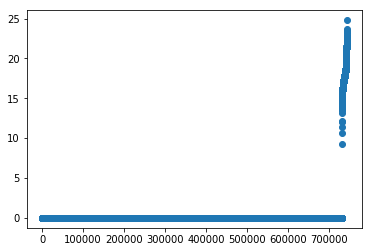

In [14]:
data_json_del['transactionRevenue'] = data_json_del['transactionRevenue'].astype('float')
tru = data_json_del.groupby('fullVisitorId')['transactionRevenue'].sum().reset_index()
plt.scatter(range(tru.shape[0]),np.sort(np.log1p(tru['transactionRevenue'].values)))
plt.show()

From above plot we can see only few users are involved in purchasing i.e; generating revenue to Gstore

In [15]:
cust_rev = (tru['transactionRevenue']>0).sum()
print("number of unique customers having non zero revenue",cust_rev,"also the ratio is ",cust_rev/tru.shape[0])

number of unique customers having non zero revenue 10366 also the ratio is  0.013956525544103886


We can observe that only 1.3% users has non zero revenue

In [16]:
print("number of unique visitors in train set",data_json_del['fullVisitorId'].nunique(),"out of",data_json_del.shape[0])
print("number of unique visitors in test set",data_json_test['fullVisitorId'].nunique(),"out of",data_json_test.shape[0])

number of unique visitors in train set 742735 out of 903653
number of unique visitors in test set 652237 out of 804684


In [17]:
def horizontal_bar_chart(cust_stats, color):
    trace = go.Bar(
        y=cust_stats.index[::-1],
        x=cust_stats.values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

#Device Browser
cust_stats = data_json_del.groupby('browser')['transactionRevenue'].agg(['size', 'count'])
cust_stats.columns = ["count", "count of non-zero revenue"]
cust_stats = cust_stats.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cust_stats["count"].head(10), 'rgba(50, 171, 96, 0.6)')
trace2 = horizontal_bar_chart(cust_stats["count of non-zero revenue"].head(10), 'rgba(50, 171, 96, 0.6)')


# Device Category
cust_stats = data_json_del.groupby('deviceCategory')['transactionRevenue'].agg(['size', 'count'])
cust_stats.columns = ["count", "count of non-zero revenue"]
cust_stats = cust_stats.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(cust_stats["count"].head(10), 'rgba(71, 58, 131, 0.8)')
trace5 = horizontal_bar_chart(cust_stats["count of non-zero revenue"].head(10), 'rgba(71, 58, 131, 0.8)')


# Operating system
cust_stats = data_json_del.groupby('operatingSystem')['transactionRevenue'].agg(['size', 'count'])
cust_stats.columns = ["count", "count of non-zero revenue"]
cust_stats = cust_stats.sort_values(by="count", ascending=False)
trace7 = horizontal_bar_chart(cust_stats["count"].head(10), 'rgba(246, 78, 139, 0.6)')
trace8 = horizontal_bar_chart(cust_stats["count of non-zero revenue"].head(10),'rgba(246, 78, 139, 0.6)')


# Creating two subplots
fig = tools.make_subplots(rows=3, cols=2, vertical_spacing=0.04, 
                          subplot_titles=["Device Browser - Count", "Device Browser - Non-zero Revenue Count",
                                          "Device Category - Count",  "Device Category - Non-zero Revenue Count", 
                                          "Device OS - Count", "Device OS - Non-zero Revenue Count"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 2)

fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Device Plots")
py.iplot(fig, filename='device-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5 ]  [ (3,2) x6,y6 ]



1. We can see Device browsers are similar in both count and non-zero revenue plots.
2. In Device Category, Mobile is more in count than non zero revenue count.
3. In device OS, Windows count is more in count that non zero revenue.
4. Also Chrome OS count in Non Zero revenue count is more than total count.

In [18]:
# Continent
cust_stats = data_json_del.groupby('continent')['transactionRevenue'].agg(['size', 'count'])
cust_stats.columns = ["count", "count of non-zero revenue"]
cust_stats = cust_stats.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cust_stats["count"].head(10), 'rgba(50, 171, 96, 0.6)')
trace2 = horizontal_bar_chart(cust_stats["count of non-zero revenue"].head(10), 'rgba(50, 171, 96, 0.6)')

# Sub Continent

cust_stats = data_json_del.groupby('subContinent')['transactionRevenue'].agg(['size', 'count'])
cust_stats.columns = ["count", "count of non-zero revenue"]
cust_stats = cust_stats.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(cust_stats["count"].head(10), 'rgba(71, 58, 131, 0.8)')
trace5 = horizontal_bar_chart(cust_stats["count of non-zero revenue"].head(10), 'rgba(71, 58, 131, 0.8)')


# Network domain
cust_stats = data_json_del.groupby('networkDomain')['transactionRevenue'].agg(['size', 'count'])
cust_stats.columns = ["count", "count of non-zero revenue"]
cust_stats = cust_stats.sort_values(by="count", ascending=False)
trace7 = horizontal_bar_chart(cust_stats["count"].head(10), 'rgba(246, 78, 139, 0.6)')
trace8 = horizontal_bar_chart(cust_stats["count of non-zero revenue"].head(10),'rgba(246, 78, 139, 0.6)')


# Creating two subplots
fig = tools.make_subplots(rows=3, cols=2, vertical_spacing=0.04, 
                          subplot_titles=["Continent - Count", "Continent - Non-zero Revenue Count",
                                          "Sub Continent - Count",  "Sub Continent - Non-zero Revenue Count",
                                          "Network Domain - Count", "Network Domain - Non-zero Revenue Count"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 2)

fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Geo Plots")
py.iplot(fig, filename='Geo-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5 ]  [ (3,2) x6,y6 ]



Inferences:

1. We can see America is most popular with more count and in that Northern America is most revenue generated sub continent.
2. We can see unknown.unknown is second most in total count, but it is much varied with Non zero revenue

We can remove all constant features among the train data and also features which are not in test data

In [19]:
const_df = [col for col in data_json_del.columns if data_json_del[col].nunique(dropna=False)==1 ]
const_df

['socialEngagementType',
 'browserSize',
 'browserVersion',
 'flashVersion',
 'language',
 'mobileDeviceBranding',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'mobileDeviceModel',
 'mobileInputSelector',
 'operatingSystemVersion',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'visits',
 'adwordsClickInfo.criteriaParameters']

In [20]:
print("coulmns in train but not test",set(data_json_del.columns).difference(set(data_json_test.columns)))

coulmns in train but not test {'campaignCode', 'transactionRevenue'}


so we need to remove CampaignCode too

In [21]:
data_json_del = data_json_del.drop(const_df+['campaignCode']+['sessionId'],axis=1)

In [22]:
data_json_test = data_json_test.drop(const_df+['sessionId'],axis=1)

In [23]:
data_json_del["transactionRevenue"].fillna(0, inplace=True)
train_y = data_json_del["transactionRevenue"].values
train_id = data_json_del["fullVisitorId"].values
test_id = data_json_test["fullVisitorId"].values


# label encode the categorical variables and convert the numerical variables to float
cat_cols = ["channelGrouping", "browser", 
            "deviceCategory", "operatingSystem", 
            "city", "continent", 
            "country", "metro",
            "networkDomain", "region", 
            "subContinent", "adContent", 
            "adwordsClickInfo.adNetworkType", 
            "adwordsClickInfo.gclId", 
            "adwordsClickInfo.page", 
            "adwordsClickInfo.slot", "campaign",
            "keyword", "medium", 
            "referralPath", "source",
            'adwordsClickInfo.isVideoAd', 'isTrueDirect']
for col in cat_cols:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(data_json_del[col].values.astype('str')) + list(data_json_test[col].values.astype('str')))
    data_json_del[col] = lbl.transform(list(data_json_del[col].values.astype('str')))
    data_json_test[col] = lbl.transform(list(data_json_test[col].values.astype('str')))






channelGrouping
browser
deviceCategory
operatingSystem
city
continent
country
metro
networkDomain
region
subContinent
adContent
adwordsClickInfo.adNetworkType
adwordsClickInfo.gclId
adwordsClickInfo.page
adwordsClickInfo.slot
campaign
keyword
medium
referralPath
source
adwordsClickInfo.isVideoAd
isTrueDirect


In [24]:
num_cols = ["hits", "pageviews", "visitNumber", "visitStartTime", 'bounces',  'newVisits']    
for col in num_cols:
    data_json_del[col] = data_json_del[col].astype(float)
    data_json_test[col] = data_json_test[col].astype(float)




In [25]:
import datetime
data_json_del['date'] = data_json_del['date'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))
dev_set = data_json_del[data_json_del['date']<=datetime.date(2017,5,31)]
val_set = data_json_del[data_json_del['date']>datetime.date(2017,5,31)]
dev_y = np.log1p(dev_set["transactionRevenue"].values)
val_y = np.log1p(val_set["transactionRevenue"].values)

dev_X = dev_set[cat_cols + num_cols] 
val_X = val_set[cat_cols + num_cols] 
test_X = data_json_test[cat_cols + num_cols] 


In [28]:
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return pred_test_y, model, pred_val_y

# Training the model #
pred_test, model, pred_val = run_lgb(dev_X, dev_y, val_X, val_y, test_X)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.69586
[200]	valid_0's rmse: 1.69126
[300]	valid_0's rmse: 1.69175
Early stopping, best iteration is:
[254]	valid_0's rmse: 1.69087


In [32]:
from sklearn import metrics
pred_val[pred_val<0] = 0
val_pred_df = pd.DataFrame({"fullVisitorId":val_set["fullVisitorId"].values})
val_pred_df["transactionRevenue"] = val_set["transactionRevenue"].values
val_pred_df["PredictedRevenue"] = np.expm1(pred_val)
val_pred_df = val_pred_df.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))

1.7158569628695757


In [29]:
sub_df = pd.DataFrame({"fullVisitorId":test_id})
pred_test[pred_test<0] = 0
sub_df["PredictedLogRevenue"] = np.expm1(pred_test)
sub_df = sub_df.groupby("fullVisitorId")["PredictedLogRevenue"].sum().reset_index()
sub_df.columns = ["fullVisitorId", "PredictedLogRevenue"]
sub_df["PredictedLogRevenue"] = np.log1p(sub_df["PredictedLogRevenue"])
sub_df.to_csv("baseline_lgb.csv", index=False)